In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from glob import glob
import os
import re
import pyemma.msm as msm
import pyemma.coordinates as coor
import numpy as np
import my_network_plot as myplt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
import operator
import pandas as pd
import mdtraj as md
import matplotlib.image as mpimg 


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/pyemma/util/log.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.5.
  .format(latest=latest, current=current), category=UserWarning)


# Load the data

Below is the parameters cell for papermill parameterisation:

In [2]:
traj_num = 3

The paths to the relevant objects


# msm_paths = [os.path.join(data_dir, '{}_msm_obj.pyemma'.format(i)) for i in range(1000)]
# dtraj_obj_paths = [os.path.join(data_dir, '{}_dtraj_obj.pyemma'.format(i)) for i in range(1000)]


### HMMs

`hmm_idx` is a list of the time slices for which a HMM was converged. An idx of `2` indicates the slice `2 - 3 ns` has a HMM.    

vhmm_idx[:10]

### Discrete trajectories


dtrajs = [np.load(x) for x in dtraj_paths]

# Identifying interesting time slices


We only want to keep those chunks for which the timescales and corresponding HMM meet certain criteria. 

1. The HMM can't contain absorbing states. 
2. The MSM timescales are all longer than the MSM lag time (so are not spurious). 


## Converge Bayes HMMs for each MLE HMM

In [96]:
from pyemma import config # doctest: +SKIP
config.show_progress_bars = False

In [98]:
bayes_ts = {'traj_num': [], 'time_idx': [], 'ts_idx': [], 'mean_ts_ps': []}
root_dir = 'msm_10ps'

for traj_num in [1,3,4,6,7,8,9,10]:
    data_dir = root_dir+'/output_{}'.format(traj_num)
    hmm_paths = glob(os.path.join(data_dir, '*_hmm_obj.pyemma'))
    hmm_idx = [int(re.search('^[0-9]+', os.path.basename(x)).group(0)) for x in hmm_paths]
    dtraj_paths = [os.path.join(data_dir, '{}_dtraj.npy'.format(i)) for i in hmm_idx]
    print(traj_num)
    for i in range(len(hmm_idx)):
        print('\tTrying idx = {}'.format(hmm_idx[i]), end='...')
        # Get HMM parameters: 
        hmm = msm.MaximumLikelihoodHMSM().load(hmm_paths[i])
        nstates = hmm.nstates
        lag = hmm.lag
        dt = np.round(10/lag, 2)
        # Check for any silly models
        if np.any(np.diag(hmm.transition_matrix)==1):
            print('Failed :(')
            continue 
        if np.any(hmm.stationary_distribution < 1e-8):
            print('Failed :(')
            continue
        print('OK!')
        # Fit Bayes model
        dtraj = np.load(dtraj_paths[i])
        bhmm = msm.bayesian_hidden_markov_model(dtraj, nstates=nstates, 
                                                lag=lag, nsamples=1000)

        # Record results
        bayes_ts['traj_num'].extend(np.repeat(traj_num, nstates-1))
        bayes_ts['time_idx'].extend(np.repeat(hmm_idx[i], nstates-1))
        bayes_ts['ts_idx'].extend(np.arange(nstates-1)+2)
        bayes_ts['mean_ts_ps'].extend(bhmm.sample_mean('timescales')*dt)
    

1
	Trying idx = 2...OK!
	Trying idx = 994...Failed :(
	Trying idx = 981...OK!
	Trying idx = 882...OK!
	Trying idx = 32...OK!
	Trying idx = 27...Failed :(
	Trying idx = 127...OK!
	Trying idx = 132...OK!
	Trying idx = 56...OK!
	Trying idx = 143...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 156...OK!
	Trying idx = 303...Failed :(
	Trying idx = 963...OK!
	Trying idx = 976...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 200...OK!
	Trying idx = 215...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 875...OK!
	Trying idx = 912...OK!
	Trying idx = 989...OK!
	Trying idx = 264...OK!
	Trying idx = 271...Failed :(
	Trying idx = 438...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 135...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 35...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 534...Failed :(
	Trying idx = 908...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 993...OK!
	Trying idx = 5...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 151...OK!
	Trying idx = 144...OK!
	Trying idx = 51...Failed :(
	Trying idx = 695...Failed :(
	Trying idx = 212...OK!
	Trying idx = 207...OK!
	Trying idx = 971...OK!
	Trying idx = 964...OK!
	Trying idx = 304...OK!
	Trying idx = 159...OK!
	Trying idx = 59...OK!
	Trying idx = 529...OK!
	Trying idx = 128...OK!
	Trying idx = 28...OK!
	Trying idx = 360...OK!
	Trying idx = 158...OK!
	Trying idx = 965...Failed :(
	Trying idx = 206...OK!
	Trying idx = 213...Failed :(
	Trying idx = 29...OK!
	Trying idx = 129...OK!
	Trying idx = 528...Failed :(
	Trying idx = 760...Failed :(
	Trying idx = 914...OK!
	Trying idx = 663...OK!
	Trying idx = 4...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 992...OK!
	Trying idx = 909...OK!
	Trying idx = 535...OK!
	Trying idx = 768...OK!
	Trying idx = 34...OK!
	Trying idx = 21...OK!
	Trying idx = 134...OK!
	Trying idx = 884...OK!
	Trying idx = 295...OK!
	Trying idx = 145...OK!
	Trying idx = 150...OK!
	Trying idx = 448...Failed :(
	Trying idx = 913...OK!
	Trying idx = 906...OK!
	Trying idx = 767...OK!
	Trying idx = 883...OK!
	Trying idx = 133...OK!
	Trying idx = 126...OK!
	Trying idx = 26...OK!
	Trying idx = 33...Failed :(
	Trying idx = 3...Failed :(
	Trying idx = 157...OK!
	Trying idx = 142...OK!
	Trying idx = 42...Failed :(
	Trying idx = 209...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 765...Failed :(
	Trying idx = 39...OK!
	Trying idx = 139...OK!
	Trying idx = 911...Failed :(
	Trying idx = 666...OK!
	Trying idx = 267...OK!
	Trying idx = 807...OK!
	Trying idx = 48...OK!
	Trying idx = 148...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 968...OK!
	Trying idx = 55...OK!
	Trying idx = 140...OK!
	Trying idx = 1...Failed :(
	Trying idx = 982...Failed :(
	Trying idx = 24...OK!
	Trying idx = 31...OK!
	Trying idx = 124...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 881...OK!
	Trying idx = 379...OK!
	Trying idx = 530...OK!
	Trying idx = 260...Failed :(
	Trying idx = 903...OK!
	Trying idx = 916...OK!
	Trying idx = 147...OK!
	Trying idx = 152...OK!
	Trying idx = 52...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 879...OK!
	Trying idx = 123...OK!
	Trying idx = 36...Failed :(
	Trying idx = 23...OK!
	Trying idx = 6...Failed :(
	Trying idx = 808...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 153...OK!
	Trying idx = 269...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 37...OK!
	Trying idx = 137...OK!
	Trying idx = 122...OK!
	Trying idx = 523...OK!
	Trying idx = 536...Failed :(
	Trying idx = 973...OK!
	Trying idx = 966...Failed :(
	Trying idx = 604...Failed :(
	Trying idx = 210...OK!
	Trying idx = 870...Failed :(
	Trying idx = 540...OK!
	Trying idx = 141...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 154...OK!
	Trying idx = 41...Failed :(
	Trying idx = 291...OK!
	Trying idx = 524...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 30...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 25...Failed :(
	Trying idx = 996...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 983...OK!
	Trying idx = 266...OK!
	Trying idx = 905...OK!
	Trying idx = 974...OK!
	Trying idx = 149...OK!
	Trying idx = 49...OK!
	Trying idx = 160...OK!
	Trying idx = 75...Failed :(
	Trying idx = 729...Failed :(
	Trying idx = 948...OK!
	Trying idx = 413...OK!
	Trying idx = 111...OK!
	Trying idx = 104...OK!
	Trying idx = 359...OK!
	Trying idx = 924...Failed :(
	Trying idx = 119...OK!
	Trying idx = 351...OK!
	Trying idx = 827...Failed :(
	Trying idx = 832...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 197...OK!
	Trying idx = 843...Failed :(
	Trying idx = 223...OK!
	Trying idx = 67...OK!
	Trying idx = 239...OK!
	Trying idx = 198...OK!
	Trying idx = 240...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 90...Failed :(
	Trying idx = 820...Failed :(
	Trying idx = 356...OK!
	Trying idx = 343...Failed :(
	Trying idx = 224...Failed :(
	Trying idx = 851...OK!
	Trying idx = 947...Failed :(
	Trying idx = 937...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 342...Failed :(
	Trying idx = 191...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 84...Failed :(
	Trying idx = 821...OK!
	Trying idx = 946...Failed :(
	Trying idx = 230...OK!
	Trying idx = 225...OK!
	Trying idx = 238...Failed :(
	Trying idx = 73...OK!
	Trying idx = 99...OK!
	Trying idx = 117...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 246...OK!
	Trying idx = 83...Failed :(
	Trying idx = 118...OK!
	Trying idx = 519...OK!
	Trying idx = 925...OK!
	Trying idx = 842...OK!
	Trying idx = 69...OK!
	Trying idx = 941...OK!
	Trying idx = 954...OK!
	Trying idx = 949...Failed :(
	Trying idx = 728...Failed :(
	Trying idx = 74...OK!
	Trying idx = 61...OK!
	Trying idx = 161...OK!
	Trying idx = 105...OK!
	Trying idx = 110...OK!
	Trying idx = 358...OK!
	Trying idx = 855...OK!
	Trying idx = 194...OK!
	Trying idx = 81...OK!
	Trying idx = 831...Failed :(
	Trying idx = 824...OK!
	Trying idx = 259...Failed :(
	Trying idx = 89...Failed :(
	Trying idx = 112...OK!
	Trying idx = 848...OK!
	Trying idx = 163...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 76...Failed :(
	Trying idx = 79...Failed :(
	Trying idx = 243...Failed :(
	Trying idx = 86...OK!
	Trying idx = 115...OK!
	Trying idx = 100...OK!
	Trying idx = 164...OK!
	Trying idx = 114...OK!
	Trying idx = 165...Failed :(
	Trying idx = 170...OK!
	Trying idx = 70...Failed :(
	Trying idx = 945...Failed :(
	Trying idx = 78...Failed :(
	Trying idx = 853...OK!
	Trying idx = 226...Failed :(
	Trying idx = 233...OK!
	Trying idx = 740...OK!
	Trying idx = 837...OK!
	Trying idx = 822...OK!
	Trying idx = 192...Failed :(
	Trying idx = 187...OK!
	Trying idx = 242...Failed :(
	Trying idx = 113...OK!
	Trying idx = 106...OK!
	Trying idx = 507...Failed :(
	Trying idx = 258...Failed :(
	Trying idx = 62...Failed :(
	Trying idx = 162...OK!
	Trying idx = 635...OK!
	Trying idx = 221...OK!
	Trying idx = 841...OK!
	Trying idx = 942...Failed :(
	Trying idx = 80...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 830...OK!
3
	Trying idx = 2...OK!
	Trying idx = 994...OK!
	Trying idx = 981...Failed :(
	Trying idx = 882...OK!
	Trying idx = 27...Failed :(
	Trying idx = 127...OK!
	Trying idx = 132...OK!
	Trying idx = 784...OK!
	Trying idx = 868...Failed :(
	Trying idx = 208...OK!
	Trying idx = 56...OK!
	Trying idx = 143...Failed :(
	Trying idx = 963...OK!
	Trying idx = 215...OK!
	Trying idx = 860...OK!
	Trying idx = 799...OK!
	Trying idx = 773...OK!
	Trying idx = 271...Failed :(
	Trying idx = 804...OK!
	Trying idx = 135...OK!
	Trying idx = 120...OK!
	Trying idx = 20...OK!
	Trying idx = 890...OK!
	Trying idx = 885...OK!
	Trying idx = 769...Failed :(
	Trying idx = 986...OK!
	Trying idx = 993...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 151...OK!
	Trying idx = 44...OK!
	Trying idx = 51...OK!
	Trying idx = 281...Failed :(
	Trying idx = 979...OK!
	Trying idx = 783...OK!
	Trying idx = 796...OK!
	Trying idx = 867...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 207...Failed :(
	Trying idx = 971...OK!
	Trying idx = 159...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 59...OK!
	Trying idx = 803...OK!
	Trying idx = 816...Failed :(
	Trying idx = 900...OK!
	Trying idx = 774...OK!
	Trying idx = 128...OK!
	Trying idx = 898...Failed :(
	Trying idx = 310...OK!
	Trying idx = 305...OK!
	Trying idx = 158...OK!
	Trying idx = 206...Failed :(
	Trying idx = 213...OK!
	Trying idx = 873...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 866...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 129...OK!
	Trying idx = 899...OK!
	Trying idx = 914...Failed :(
	Trying idx = 277...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 992...OK!
	Trying idx = 987...OK!
	Trying idx = 21...OK!
	Trying idx = 121...Failed :(
	Trying idx = 134...OK!
	Trying idx = 884...Failed :(
	Trying idx = 891...OK!
	Trying idx = 782...OK!
	Trying idx = 978...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 318...OK!
	Trying idx = 50...OK!
	Trying idx = 45...OK!
	Trying idx = 150...Failed :(
	Trying idx = 798...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 214...OK!
	Trying idx = 201...OK!
	Trying idx = 962...OK!
	Trying idx = 716...OK!
	Trying idx = 302...Failed :(
	Trying idx = 805...OK!
	Trying idx = 810...OK!
	Trying idx = 270...Failed :(
	Trying idx = 988...OK!
	Trying idx = 913...Failed :(
	Trying idx = 767...OK!
	Trying idx = 896...OK!
	Trying idx = 883...OK!
	Trying idx = 133...OK!
	Trying idx = 126...OK!
	Trying idx = 26...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 278...Failed :(
	Trying idx = 980...OK!
	Trying idx = 818...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 3...OK!
	Trying idx = 157...OK!
	Trying idx = 142...Failed :(
	Trying idx = 42...OK!
	Trying idx = 869...Failed :(
	Trying idx = 785...OK!
	Trying idx = 790...OK!
	Trying idx = 770...OK!
	Trying idx = 765...OK!
	Trying idx = 39...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 139...OK!
	Trying idx = 889...OK!
	Trying idx = 904...OK!
	Trying idx = 272...OK!
	Trying idx = 267...Failed :(
	Trying idx = 812...OK!
	Trying idx = 714...OK!
	Trying idx = 701...Failed :(
	Trying idx = 699...OK!
	Trying idx = 975...OK!
	Trying idx = 960...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 298...OK!
	Trying idx = 203...OK!
	Trying idx = 787...OK!
	Trying idx = 40...Failed :(
	Trying idx = 55...OK!
	Trying idx = 140...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 709...Failed :(
	Trying idx = 997...OK!
	Trying idx = 919...Failed :(
	Trying idx = 24...Failed :(
	Trying idx = 131...OK!
	Trying idx = 124...OK!
	Trying idx = 894...OK!
	Trying idx = 881...OK!
	Trying idx = 778...OK!
	Trying idx = 815...Failed :(
	Trying idx = 800...OK!
	Trying idx = 260...OK!
	Trying idx = 998...Failed :(
	Trying idx = 903...OK!
	Trying idx = 916...Failed :(
	Trying idx = 762...OK!
	Trying idx = 777...OK!
	Trying idx = 871...OK!
	Trying idx = 788...OK!
	Trying idx = 211...OK!
	Trying idx = 312...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 713...OK!
	Trying idx = 147...OK!
	Trying idx = 52...OK!
	Trying idx = 282...Failed :(
	Trying idx = 219...OK!
	Trying idx = 795...OK!
	Trying idx = 780...OK!
	Trying idx = 879...OK!
	Trying idx = 886...OK!
	Trying idx = 123...OK!
	Trying idx = 136...OK!
	Trying idx = 36...OK!
	Trying idx = 990...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 985...OK!
	Trying idx = 6...Failed :(
	Trying idx = 808...OK!
	Trying idx = 878...Failed :(
	Trying idx = 781...OK!
	Trying idx = 794...OK!
	Trying idx = 283...OK!
	Trying idx = 53...OK!
	Trying idx = 809...OK!
	Trying idx = 7...OK!
	Trying idx = 984...OK!
	Trying idx = 991...OK!
	Trying idx = 892...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 887...Failed :(
	Trying idx = 22...OK!
	Trying idx = 37...Failed :(
	Trying idx = 137...OK!
	Trying idx = 122...OK!
	Trying idx = 776...Failed :(
	Trying idx = 917...OK!
	Trying idx = 902...OK!
	Trying idx = 999...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 274...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 801...OK!
	Trying idx = 814...OK!
	Trying idx = 306...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 210...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 205...Failed :(
	Trying idx = 789...OK!
	Trying idx = 870...OK!
	Trying idx = 708...OK!
	Trying idx = 141...OK!
	Trying idx = 54...OK!
	Trying idx = 41...OK!
	Trying idx = 284...OK!
	Trying idx = 793...OK!
	Trying idx = 786...OK!
	Trying idx = 779...OK!
	Trying idx = 125...OK!
	Trying idx = 130...OK!
	Trying idx = 25...Failed :(
	Trying idx = 880...OK!
	Trying idx = 895...OK!
	Trying idx = 918...OK!
	Trying idx = 983...Failed :(
	Trying idx = 0...Failed :(
	Trying idx = 813...OK!
	Trying idx = 806...OK!
	Trying idx = 8...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 266...OK!
	Trying idx = 905...OK!
	Trying idx = 138...OK!
	Trying idx = 38...Failed :(
	Trying idx = 888...OK!
	Trying idx = 771...OK!
	Trying idx = 202...OK!
	Trying idx = 217...OK!
	Trying idx = 299...OK!
	Trying idx = 961...Failed :(
	Trying idx = 974...OK!
	Trying idx = 301...OK!
	Trying idx = 49...OK!
	Trying idx = 715...Failed :(
	Trying idx = 160...OK!
	Trying idx = 60...Failed :(
	Trying idx = 729...OK!
	Trying idx = 111...Failed :(
	Trying idx = 11...Failed :(
	Trying idx = 758...OK!
	Trying idx = 939...Failed :(
	Trying idx = 931...Failed :(
	Trying idx = 119...OK!
	Trying idx = 19...OK!
	Trying idx = 827...OK!
	Trying idx = 832...OK!
	Trying idx = 197...OK!
	Trying idx = 252...Failed :(
	Trying idx = 940...Failed :(
	Trying idx = 734...OK!
	Trying idx = 721...OK!
	Trying idx = 168...OK!
	Trying idx = 843...OK!
	Trying idx = 856...OK!
	Trying idx = 223...Failed :(
	Trying idx = 72...Failed :(
	Trying idx = 67...Failed :(
	Trying idx = 859...OK!
	Trying idx = 239

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 116...OK!
	Trying idx = 248...Failed :(
	Trying idx = 255...OK!
	Trying idx = 85...OK!
	Trying idx = 835...Failed :(
	Trying idx = 820...OK!
	Trying idx = 742...OK!
	Trying idx = 757...OK!
	Trying idx = 224...OK!
	Trying idx = 332...OK!
	Trying idx = 733...OK!
	Trying idx = 922...OK!
	Trying idx = 743...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 84...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 821...OK!
	Trying idx = 834...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 241...Failed :(
	Trying idx = 953...OK!
	Trying idx = 732...OK!
	Trying idx = 230...OK!
	Trying idx = 66...Failed :(
	Trying idx = 249...OK!
	Trying idx = 199...OK!
	Trying idx = 99...Failed :(
	Trying idx = 829...OK!
	Trying idx = 117...OK!
	Trying idx = 17...Failed :(
	Trying idx = 826...OK!
	Trying idx = 83...OK!
	Trying idx = 96...OK!
	Trying idx = 196...OK!
	Trying idx = 18...OK!
	Trying idx = 118...OK!
	Trying idx = 744...OK!
	Trying idx = 751...OK!
	Trying idx = 222...OK!
	Trying idx = 237...OK!
	Trying idx = 728...Failed :(
	Trying idx = 161...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 759...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 110...OK!
	Trying idx = 323...OK!
	Trying idx = 722...Failed :(
	Trying idx = 737...OK!
	Trying idx = 220...OK!
	Trying idx = 235...OK!
	Trying idx = 927...OK!
	Trying idx = 932...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 753...Failed :(
	Trying idx = 194...OK!
	Trying idx = 81...Failed :(
	Trying idx = 831...OK!
	Trying idx = 824...OK!
	Trying idx = 244...OK!
	Trying idx = 259...OK!
	Trying idx = 89...OK!
	Trying idx = 107...OK!
	Trying idx = 112...OK!
	Trying idx = 848...Failed :(
	Trying idx = 76...OK!
	Trying idx = 63...OK!
	Trying idx = 232...Failed :(
	Trying idx = 847...OK!
	Trying idx = 852...OK!
	Trying idx = 730...Failed :(
	Trying idx = 331...Failed :(
	Trying idx = 256...OK!
	Trying idx = 243...Failed :(
	Trying idx = 823...OK!
	Trying idx = 836...OK!
	Trying idx = 86...OK!
	Trying idx = 754...OK!
	Trying idx = 741...OK!
	Trying idx = 108...OK!
	Trying idx = 935...OK!
	Trying idx = 15...Failed :(
	Trying idx = 115...OK!
	Trying idx = 100...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 959...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 64...OK!
	Trying idx = 71...Failed :(
	Trying idx = 114...OK!
	Trying idx = 14...Failed :(
	Trying idx = 739...Failed :(
	Trying idx = 165...OK!
	Trying idx = 70...OK!
	Trying idx = 65...OK!
	Trying idx = 945...OK!
	Trying idx = 78...OK!
	Trying idx = 724...OK!
	Trying idx = 226...OK!
	Trying idx = 233...OK!
	Trying idx = 627...Failed :(
	Trying idx = 921...Failed :(
	Trying idx = 109...OK!
	Trying idx = 755...OK!
	Trying idx = 837...OK!
	Trying idx = 822...OK!
	Trying idx = 242...Failed :(
	Trying idx = 257...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 13...Failed :(
	Trying idx = 113...OK!
	Trying idx = 106...OK!
	Trying idx = 507...OK!
	Trying idx = 88...Failed :(
	Trying idx = 838...OK!
	Trying idx = 258...Failed :(
	Trying idx = 162...Failed :(
	Trying idx = 234...OK!
	Trying idx = 221...OK!
	Trying idx = 736...OK!
	Trying idx = 723...OK!
	Trying idx = 957...OK!
	Trying idx = 80...OK!
	Trying idx = 195...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 830...OK!
	Trying idx = 752...OK!
	Trying idx = 747...Failed :(
	Trying idx = 933...Failed :(
4
	Trying idx = 678...OK!
	Trying idx = 526...OK!
	Trying idx = 454...OK!
	Trying idx = 208...OK!
	Trying idx = 692...Failed :(
	Trying idx = 286...OK!
	Trying idx = 557...Failed :(
	Trying idx = 717...OK!
	Trying idx = 963...OK!
	Trying idx = 200...Failed :(
	Trying idx = 766...OK!
	Trying idx = 20...OK!
	Trying idx = 890...OK!
	Trying idx = 534...OK!
	Trying idx = 993...OK!
	Trying idx = 5...Failed :(
	Trying idx = 151...Failed :(
	Trying idx = 718...OK!
	Trying idx = 545...OK!
	Trying idx = 550...OK!
	Trying idx = 979...OK!
	Trying idx = 397...OK!
	Trying idx = 382...OK!
	Trying idx = 606...OK!
	Trying idx = 212...OK!
	Trying idx = 688...Failed :(
	Trying idx = 529...OK!
	Trying idx = 774...OK!
	Trying idx = 58...OK!
	Trying idx = 689...OK!
	Trying idx = 899...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 277...OK!
	Trying idx = 4...OK!
	Trying idx = 909...OK!
	Trying idx = 768...OK!
	Trying idx = 21...Failed :(
	Trying idx = 884...OK!
	Trying idx = 978...OK!
	Trying idx = 600...Failed :(
	Trying idx = 201...OK!
	Trying idx = 962...OK!
	Trying idx = 716...OK!
	Trying idx = 805...OK!
	Trying idx = 810...OK!
	Trying idx = 671...OK!
	Trying idx = 772...Failed :(
	Trying idx = 126...OK!
	Trying idx = 527...OK!
	Trying idx = 278...OK!
	Trying idx = 3...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 543...OK!
	Trying idx = 686...Failed :(
	Trying idx = 869...OK!
	Trying idx = 785...OK!
	Trying idx = 790...OK!
	Trying idx = 765...OK!
	Trying idx = 272...Failed :(
	Trying idx = 807...OK!
	Trying idx = 812...OK!
	Trying idx = 701...Failed :(
	Trying idx = 975...OK!
	Trying idx = 602...OK!
	Trying idx = 876...OK!
	Trying idx = 285...OK!
	Trying idx = 691...OK!
	Trying idx = 55...OK!
	Trying idx = 982...OK!
	Trying idx = 24...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 379...OK!
	Trying idx = 778...Failed :(
	Trying idx = 916...OK!
	Trying idx = 211...OK!
	Trying idx = 972...OK!
	Trying idx = 546...OK!
	Trying idx = 219...OK!
	Trying idx = 780...Failed :(
	Trying idx = 6...OK!
	Trying idx = 619...OK!
	Trying idx = 153...Failed :(
	Trying idx = 552...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 809...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 22...OK!
	Trying idx = 763...OK!
	Trying idx = 917...Failed :(
	Trying idx = 712...Failed :(
	Trying idx = 604...OK!
	Trying idx = 210...OK!
	Trying idx = 789...OK!
	Trying idx = 555...Failed :(
	Trying idx = 540...OK!
	Trying idx = 685...Failed :(
	Trying idx = 690...OK!
	Trying idx = 793...OK!
	Trying idx = 0...Failed :(
	Trying idx = 813...Failed :(
	Trying idx = 8...OK!
	Trying idx = 202...OK!
	Trying idx = 974...OK!
	Trying idx = 715...OK!
	Trying idx = 75...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 729...OK!
	Trying idx = 561...OK!
	Trying idx = 574...OK!
	Trying idx = 104...OK!
	Trying idx = 11...OK!
	Trying idx = 359...Failed :(
	Trying idx = 505...OK!
	Trying idx = 495...OK!
	Trying idx = 19...Failed :(
	Trying idx = 596...Failed :(
	Trying idx = 832...OK!
	Trying idx = 182...OK!
	Trying idx = 97...Failed :(
	Trying idx = 252...Failed :(
	Trying idx = 721...OK!
	Trying idx = 223...OK!
	Trying idx = 239...Failed :(
	Trying idx = 502...Failed :(
	Trying idx = 103...OK!
	Trying idx = 599...OK!
	Trying idx = 820...Failed :(
	Trying idx = 742...Failed :(
	Trying idx = 936...OK!
	Trying idx = 478...OK!
	Trying idx = 357...Failed :(
	Trying idx = 590...OK!
	Trying idx = 84...OK!
	Trying idx = 834...Failed :(
	Trying idx = 655...OK!
	Trying idx = 254...OK!
	Trying idx = 241...Failed :(
	Trying idx = 732...Failed :(
	Trying idx = 479...OK!
	Trying idx = 225...OK!
	Trying idx = 66...OK!
	Trying idx = 648...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 415...OK!
	Trying idx = 199...OK!
	Trying idx = 99...OK!
	Trying idx = 829...Failed :(
	Trying idx = 598...OK!
	Trying idx = 102...OK!
	Trying idx = 503...Failed :(
	Trying idx = 246...OK!
	Trying idx = 96...OK!
	Trying idx = 350...Failed :(
	Trying idx = 345...Failed :(
	Trying idx = 925...OK!
	Trying idx = 222...OK!
	Trying idx = 237...Failed :(
	Trying idx = 842...OK!
	Trying idx = 941...OK!
	Trying idx = 938...OK!
	Trying idx = 358...Failed :(
	Trying idx = 722...Failed :(
	Trying idx = 927...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 352...Failed :(
	Trying idx = 94...OK!
	Trying idx = 658...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 89...OK!
	Trying idx = 506...OK!
	Trying idx = 107...OK!
	Trying idx = 112...OK!
	Trying idx = 12...Failed :(
	Trying idx = 629...OK!
	Trying idx = 562...OK!
	Trying idx = 176...Failed :(
	Trying idx = 730...Failed :(
	Trying idx = 725...OK!
	Trying idx = 657...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 592...OK!
	Trying idx = 93...Failed :(
	Trying idx = 186...OK!
	Trying idx = 15...OK!
	Trying idx = 348...Failed :(
	Trying idx = 749...OK!
	Trying idx = 339...OK!
	Trying idx = 64...OK!
	Trying idx = 738...Failed :(
	Trying idx = 748...OK!
	Trying idx = 14...Failed :(
	Trying idx = 349...OK!
	Trying idx = 739...OK!
	Trying idx = 70...OK!
	Trying idx = 65...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 945...OK!
	Trying idx = 178...OK!
	Trying idx = 724...OK!
	Trying idx = 731...Failed :(
	Trying idx = 354...Failed :(
	Trying idx = 837...OK!
	Trying idx = 87...OK!
	Trying idx = 13...OK!
	Trying idx = 88...Failed :(
	Trying idx = 188...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 576...Failed :(
	Trying idx = 628...OK!
	Trying idx = 635...OK!
	Trying idx = 942...OK!
	Trying idx = 245...Failed :(
	Trying idx = 594...OK!
	Trying idx = 95...OK!
	Trying idx = 830...OK!
	Trying idx = 346...OK!
	Trying idx = 353...OK!
6
	Trying idx = 2...Failed :(
	Trying idx = 819...OK!
	Trying idx = 678...OK!
	Trying idx = 430...Failed :(
	Trying idx = 981...OK!
	Trying idx = 279...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 526...Failed :(
	Trying idx = 791...OK!
	Trying idx = 784...OK!
	Trying idx = 868...OK!
	Trying idx = 385...Failed :(
	Trying idx = 390...OK!
	Trying idx = 609...OK!
	Trying idx = 692...OK!
	Trying idx = 286...OK!
	Trying idx = 557...OK!
	Trying idx = 702...OK!
	Trying idx = 717...OK!
	Trying idx = 963...OK!
	Trying idx = 976...Failed :(
	Trying idx = 614...OK!
	Trying idx = 601...Failed :(
	Trying idx = 860...OK!
	Trying idx = 398...Failed :(
	Trying idx = 799...OK!
	Trying idx = 766...OK!
	Trying idx = 773...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 912...OK!
	Trying idx = 264...OK!
	Trying idx = 670...OK!
	Trying idx = 665...OK!
	Trying idx = 438...OK!
	Trying idx = 811...OK!
	Trying idx = 804...Failed :(
	Trying idx = 135...Failed :(
	Trying idx = 20...OK!
	Trying idx = 993...OK!
	Trying idx = 422...Failed :(
	Trying idx = 5...Failed :(
	Trying idx = 151...OK!
	Trying idx = 144...OK!
	Trying idx = 718...Failed :(
	Trying idx = 545...OK!
	Trying idx = 281...OK!
	Trying idx = 695...OK!
	Trying idx = 397...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 613...Failed :(
	Trying idx = 212...OK!
	Trying idx = 207...Failed :(
	Trying idx = 971...OK!
	Trying idx = 964...OK!
	Trying idx = 710...OK!
	Trying idx = 705...OK!
	Trying idx = 558...OK!
	Trying idx = 304...OK!
	Trying idx = 59...OK!
	Trying idx = 662...OK!
	Trying idx = 276...OK!
	Trying idx = 263...Failed :(
	Trying idx = 529...Failed :(
	Trying idx = 774...Failed :(
	Trying idx = 58...OK!
	Trying idx = 158...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 704...OK!
	Trying idx = 711...OK!
	Trying idx = 559...OK!
	Trying idx = 970...OK!
	Trying idx = 213...Failed :(
	Trying idx = 873...OK!
	Trying idx = 866...OK!
	Trying idx = 899...OK!
	Trying idx = 775...OK!
	Trying idx = 901...OK!
	Trying idx = 676...OK!
	Trying idx = 663...Failed :(
	Trying idx = 423...Failed :(
	Trying idx = 520...OK!
	Trying idx = 21...OK!
	Trying idx = 134...OK!
	Trying idx = 797...OK!
	Trying idx = 782...OK!
	Trying idx = 383...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 396...Failed :(
	Trying idx = 681...OK!
	Trying idx = 694...OK!
	Trying idx = 978...OK!
	Trying idx = 295...Failed :(
	Trying idx = 719...OK!
	Trying idx = 150...OK!
	Trying idx = 798...OK!
	Trying idx = 399...OK!
	Trying idx = 874...OK!
	Trying idx = 600...Failed :(
	Trying idx = 962...OK!
	Trying idx = 703...OK!
	Trying idx = 805...OK!
	Trying idx = 664...OK!
	Trying idx = 439...OK!
	Trying idx = 270...Failed :(
	Trying idx = 265...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 988...Failed :(
	Trying idx = 913...OK!
	Trying idx = 772...Failed :(
	Trying idx = 767...OK!
	Trying idx = 373...OK!
	Trying idx = 896...OK!
	Trying idx = 883...OK!
	Trying idx = 133...OK!
	Trying idx = 33...Failed :(
	Trying idx = 278...OK!
	Trying idx = 995...OK!
	Trying idx = 679...OK!
	Trying idx = 431...OK!
	Trying idx = 424...Failed :(
	Trying idx = 3...Failed :(
	Trying idx = 693...OK!
	Trying idx = 790...OK!
	Trying idx = 770...OK!
	Trying idx = 139...Failed :(
	Trying idx = 889...OK!
	Trying idx = 911...OK!
	Trying idx = 904...OK!
	Trying idx = 272...OK!
	Trying idx = 267...Failed :(
	Trying idx = 9...OK!
	Trying idx = 807...OK!
	Trying idx = 812...OK!
	Trying idx = 714...OK!
	Trying idx = 701...OK!
	Trying idx = 300...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 699...OK!
	Trying idx = 975...Failed :(
	Trying idx = 602...OK!
	Trying idx = 863...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 386...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 787...OK!
	Trying idx = 792...OK!
	Trying idx = 968...OK!
	Trying idx = 691...OK!
	Trying idx = 155...OK!
	Trying idx = 140...Failed :(
	Trying idx = 709...OK!
	Trying idx = 1...Failed :(
	Trying idx = 982...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 919...OK!
	Trying idx = 24...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 131...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 894...OK!
	Trying idx = 815...OK!
	Trying idx = 800...OK!
	Trying idx = 903...OK!
	Trying idx = 376...OK!
	Trying idx = 762...OK!
	Trying idx = 777...Failed :(
	Trying idx = 871...OK!
	Trying idx = 864...OK!
	Trying idx = 211...OK!
	Trying idx = 972...Failed :(
	Trying idx = 706...OK!
	Trying idx = 713...OK!
	Trying idx = 553...OK!
	Trying idx = 152...OK!
	Trying idx = 47...OK!
	Trying idx = 683...OK!
	Trying idx = 696...OK!
	Trying idx = 795...OK!
	Trying idx = 394...Failed :(
	Trying idx = 879...OK!
	Trying idx = 893...OK!
	Trying idx = 669...OK!
	Trying idx = 421...OK!
	Trying idx = 434...OK!
	Trying idx = 808...OK!
	Trying idx = 395...OK!
	Trying idx = 697...OK!
	Trying idx = 682...OK!
	Trying idx = 153...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 552...Failed :(
	Trying idx = 809...OK!
	Trying idx = 435...OK!
	Trying idx = 420...OK!
	Trying idx = 892...OK!
	Trying idx = 22...OK!
	Trying idx = 137...Failed :(
	Trying idx = 122...OK!
	Trying idx = 536...OK!
	Trying idx = 776...Failed :(
	Trying idx = 902...OK!
	Trying idx = 660...OK!
	Trying idx = 999...Failed :(
	Trying idx = 801...OK!
	Trying idx = 814...OK!
	Trying idx = 712...OK!
	Trying idx = 707...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 973...Failed :(
	Trying idx = 604...Failed :(
	Trying idx = 865...OK!
	Trying idx = 870...OK!
	Trying idx = 708...OK!
	Trying idx = 555...OK!
	Trying idx = 141...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 969...OK!
	Trying idx = 793...OK!
	Trying idx = 531...OK!
	Trying idx = 779...OK!
	Trying idx = 125...OK!
	Trying idx = 130...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 880...OK!
	Trying idx = 895...OK!
	Trying idx = 996...OK!
	Trying idx = 0...Failed :(
	Trying idx = 813...OK!
	Trying idx = 273...OK!
	Trying idx = 138...Failed :(
	Trying idx = 862...OK!
	Trying idx = 603...OK!
	Trying idx = 974...OK!
	Trying idx = 698...OK!
	Trying idx = 700...OK!
	Trying idx = 715...OK!
	Trying idx = 175...OK!
	Trying idx = 60...OK!
	Trying idx = 729...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 561...OK!
	Trying idx = 413...Failed :(
	Trying idx = 406...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 11...OK!
	Trying idx = 505...OK!
	Trying idx = 495...Failed :(
	Trying idx = 924...OK!
	Trying idx = 750...OK!
	Trying idx = 745...OK!
	Trying idx = 119...OK!
	Trying idx = 596...OK!
	Trying idx = 832...OK!
	Trying idx = 646...OK!
	Trying idx = 653...OK!
	Trying idx = 569...OK!
	Trying idx = 856...OK!
	Trying idx = 637...OK!
	Trying idx = 573...Failed :(
	Trying idx = 566...OK!
	Trying idx = 67...OK!
	Trying idx = 859...OK!
	Trying idx = 638...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 116...OK!
	Trying idx = 599...Failed :(
	Trying idx = 198...Failed :(
	Trying idx = 828...OK!
	Trying idx = 649...OK!
	Trying idx = 414...OK!
	Trying idx = 654...OK!
	Trying idx = 641...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 409...OK!
	Trying idx = 742...OK!
	Trying idx = 231...Failed :(
	Trying idx = 630...Failed :(
	Trying idx = 625...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 726...OK!
	Trying idx = 947...OK!
	Trying idx = 756...OK!
	Trying idx = 743...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 590...Failed :(
	Trying idx = 184...OK!
	Trying idx = 191...Failed :(
	Trying idx = 821...OK!
	Trying idx = 640...OK!
	Trying idx = 655...OK!
	Trying idx = 408...OK!
	Trying idx = 732...Failed :(
	Trying idx = 727...OK!
	Trying idx = 845...OK!
	Trying idx = 850...OK!
	Trying idx = 624...Failed :(
	Trying idx = 631...OK!
	Trying idx = 639...OK!
	Trying idx = 173...OK!
	Trying idx = 166...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 567...OK!
	Trying idx = 572...Failed :(
	Trying idx = 648...OK!
	Trying idx = 415...Failed :(
	Trying idx = 400...OK!
	Trying idx = 829...OK!
	Trying idx = 598...OK!
	Trying idx = 117...OK!
	Trying idx = 17...OK!
	Trying idx = 652...OK!
	Trying idx = 647...OK!
	Trying idx = 833...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 826...OK!
	Trying idx = 751...OK!
	Trying idx = 237...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 636...OK!
	Trying idx = 842...Failed :(
	Trying idx = 169...OK!
	Trying idx = 720...OK!
	Trying idx = 568...OK!
	Trying idx = 949...OK!
	Trying idx = 728...OK!
	Trying idx = 575...OK!
	Trying idx = 560...OK!
	Trying idx = 174...OK!
	Trying idx = 511...OK!
	Trying idx = 10...OK!
	Trying idx = 407...OK!
	Trying idx = 722...OK!
	Trying idx = 855...OK!
	Trying idx = 634...OK!
	Trying idx = 927...Failed :(
	Trying idx = 753...OK!
	Trying idx = 251...OK!
	Trying idx = 650...OK!
	Trying idx = 645...OK!
	Trying idx = 418...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 658...OK!
	Trying idx = 405...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 410...OK!
	Trying idx = 588...Failed :(
	Trying idx = 839...OK!
	Trying idx = 513...OK!
	Trying idx = 12...OK!
	Trying idx = 629...Failed :(
	Trying idx = 228...OK!
	Trying idx = 848...OK!
	Trying idx = 562...OK!
	Trying idx = 163...OK!
	Trying idx = 626...OK!
	Trying idx = 633...OK!
	Trying idx = 227...Failed :(
	Trying idx = 847...OK!
	Trying idx = 730...OK!
	Trying idx = 725...OK!
	Trying idx = 179...OK!
	Trying idx = 642...OK!
	Trying idx = 657...OK!
	Trying idx = 592...OK!
	Trying idx = 587...OK!
	Trying idx = 823...OK!
	Trying idx = 186...Failed :(
	Trying idx = 509...OK!
	Trying idx = 754...OK!
	Trying idx = 920...OK!
	Trying idx = 514...Failed :(
	Trying idx = 749...OK!
	Trying idx = 417...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 402...Failed :(
	Trying idx = 171...OK!
	Trying idx = 565...OK!
	Trying idx = 570...OK!
	Trying idx = 473...OK!
	Trying idx = 466...OK!
	Trying idx = 403...OK!
	Trying idx = 416...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 14...OK!
	Trying idx = 929...OK!
	Trying idx = 571...OK!
	Trying idx = 564...OK!
	Trying idx = 165...OK!
	Trying idx = 170...OK!
	Trying idx = 958...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 950...OK!
	Trying idx = 724...OK!
	Trying idx = 731...OK!
	Trying idx = 853...Failed :(
	Trying idx = 632...OK!
	Trying idx = 627...OK!
	Trying idx = 921...OK!
	Trying idx = 755...OK!
	Trying idx = 822...OK!
	Trying idx = 586...Failed :(
	Trying idx = 593...Failed :(
	Trying idx = 656...OK!
	Trying idx = 643...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 589...OK!
	Trying idx = 659...OK!
	Trying idx = 411...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 404...OK!
	Trying idx = 62...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 563...OK!
	Trying idx = 229...OK!
	Trying idx = 475...OK!
	Trying idx = 628...OK!
	Trying idx = 635...OK!
	Trying idx = 854...OK!
	Trying idx = 723...OK!
	Trying idx = 644...OK!
	Trying idx = 651...OK!
	Trying idx = 419...OK!
	Trying idx = 180...OK!
	Trying idx = 195...OK!
	Trying idx = 825...OK!
	Trying idx = 482...OK!
	Trying idx = 933...OK!
7
	Trying idx = 32...OK!
	Trying idx = 127...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 132...Failed :(
	Trying idx = 687...Failed :(
	Trying idx = 557...OK!
	Trying idx = 56...Failed :(
	Trying idx = 143...Failed :(
	Trying idx = 156...OK!
	Trying idx = 264...Failed :(
	Trying idx = 271...Failed :(
	Trying idx = 438...OK!
	Trying idx = 20...Failed :(
	Trying idx = 35...OK!
	Trying idx = 890...OK!
	Trying idx = 885...OK!
	Trying idx = 144...OK!
	Trying idx = 44...OK!
	Trying idx = 212...OK!
	Trying idx = 688...Failed :(
	Trying idx = 971...OK!
	Trying idx = 964...OK!
	Trying idx = 558...OK!
	Trying idx = 159...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 761...OK!
	Trying idx = 128...OK!
	Trying idx = 158...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 689...Failed :(
	Trying idx = 206...OK!
	Trying idx = 213...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 129...Failed :(
	Trying idx = 901...Failed :(
	Trying idx = 34...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 21...OK!
	Trying idx = 121...Failed :(
	Trying idx = 134...OK!
	Trying idx = 145...OK!
	Trying idx = 615...Failed :(
	Trying idx = 214...OK!
	Trying idx = 201...OK!
	Trying idx = 977...OK!
	Trying idx = 671...OK!
	Trying idx = 439...OK!
	Trying idx = 270...Failed :(
	Trying idx = 265...OK!
	Trying idx = 906...OK!
	Trying idx = 896...OK!
	Trying idx = 133...Failed :(
	Trying idx = 126...Failed :(
	Trying idx = 26...Failed :(
	Trying idx = 33...OK!
	Trying idx = 980...OK!
	Trying idx = 157...OK!
	Trying idx = 686...Failed :(
	Trying idx = 384...OK!
	Trying idx = 785...OK!
	Trying idx = 139...OK!
	Trying idx = 371...Failed :(
	Trying idx = 272...OK!
	Trying idx = 267...Failed :(
	Trying idx = 701...Failed :(
	Trying idx = 48...Failed :(
	Trying idx = 203...OK!
	Trying idx = 40...OK!
	Trying idx = 55...OK!
	Trying idx = 155...OK!
	Trying idx = 140...OK!
	Trying idx = 1...OK!
	Trying idx = 982...Failed :(
	Trying idx = 24...Failed :(
	Trying idx = 31...OK!
	Trying idx = 131...

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 124...Failed :(
	Trying idx = 815...OK!
	Trying idx = 275...OK!
	Trying idx = 674...OK!
	Trying idx = 204...OK!
	Trying idx = 211...Failed :(
	Trying idx = 147...OK!
	Trying idx = 152...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 52...OK!
	Trying idx = 219...OK!
	Trying idx = 123...OK!
	Trying idx = 36...OK!
	Trying idx = 23...Failed :(
	Trying idx = 268...OK!
	Trying idx = 53...Failed :(
	Trying idx = 153...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 146...OK!
	Trying idx = 269...Failed :(
	Trying idx = 22...OK!
	Trying idx = 37...OK!
	Trying idx = 137...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 122...OK!
	Trying idx = 917...OK!
	Trying idx = 274...OK!
	Trying idx = 712...OK!
	Trying idx = 459...OK!
	Trying idx = 210...OK!
	Trying idx = 205...Failed :(
	Trying idx = 309...OK!
	Trying idx = 141...OK!
	Trying idx = 154...OK!
	Trying idx = 41...Failed :(
	Trying idx = 685...OK!
	Trying idx = 690...Failed :(
	Trying idx = 125...Failed :(
	Trying idx = 130...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 30...OK!
	Trying idx = 25...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 0...Failed :(
	Trying idx = 813...OK!
	Trying idx = 266...OK!
	Trying idx = 273...OK!
	Trying idx = 138...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 38...OK!
	Trying idx = 202...Failed :(
	Trying idx = 616...Failed :(
	Trying idx = 149...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 49...OK!
	Trying idx = 75...OK!
	Trying idx = 111...Failed :(
	Trying idx = 104...OK!
	Trying idx = 510...OK!
	Trying idx = 939...OK!
	Trying idx = 750...OK!
	Trying idx = 19...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 596...OK!
	Trying idx = 82...OK!
	Trying idx = 653...OK!
	Trying idx = 252...Failed :(
	Trying idx = 247...OK!
	Trying idx = 940...OK!
	Trying idx = 168...Failed :(
	Trying idx = 68...OK!
	Trying idx = 856...OK!
	Trying idx = 223...OK!
	Trying idx = 72...OK!
	Trying idx = 67...OK!
	Trying idx = 167...OK!
	Trying idx = 172...OK!
	Trying idx = 239...OK!
	Trying idx = 103...OK!
	Trying idx = 116...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 599...OK!
	Trying idx = 98...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 198...OK!
	Trying idx = 649...OK!
	Trying idx = 248...OK!
	Trying idx = 240...OK!
	Trying idx = 190...Failed :(
	Trying idx = 185...OK!
	Trying idx = 224...OK!
	Trying idx = 726...Failed :(
	Trying idx = 922...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 184...Failed :(
	Trying idx = 91...OK!
	Trying idx = 640...Failed :(
	Trying idx = 727...OK!
	Trying idx = 624...Failed :(
	Trying idx = 230...Failed :(
	Trying idx = 225...OK!
	Trying idx = 166...OK!
	Trying idx = 66...Failed :(
	Trying idx = 73...OK!
	Trying idx = 249...OK!
	Trying idx = 99...OK!
	Trying idx = 117...Failed :(
	Trying idx = 102...OK!
	Trying idx = 96...OK!
	Trying idx = 183...Failed :(
	Trying idx = 18...OK!
	Trying idx = 118...Failed :(
	Trying idx = 481...OK!
	Trying idx = 623...Failed :(
	Trying idx = 69...OK!
	Trying idx = 735...OK!
	Trying idx = 161...Failed :(
	Trying idx = 174...OK!
	Trying idx = 105...OK!
	Trying idx = 235...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 194...OK!
	Trying idx = 81...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 94...OK!
	Trying idx = 251...OK!
	Trying idx = 107...Failed :(
	Trying idx = 228...OK!
	Trying idx = 577...Failed :(
	Trying idx = 176...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 76...OK!
	Trying idx = 63...Failed :(
	Trying idx = 232...Failed :(
	Trying idx = 227...OK!
	Trying idx = 79...OK!
	Trying idx = 179...OK!
	Trying idx = 256...Failed :(
	Trying idx = 592...OK!
	Trying idx = 93...Failed :(
	Trying idx = 86...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 186...Failed :(
	Trying idx = 935...OK!
	Trying idx = 115...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 100...Failed :(
	Trying idx = 501...OK!
	Trying idx = 64...Failed :(
	Trying idx = 71...Failed :(
	Trying idx = 171...Failed :(
	Trying idx = 164...OK!
	Trying idx = 101...OK!
	Trying idx = 114...OK!
	Trying idx = 14...Failed :(
	Trying idx = 165...Failed :(
	Trying idx = 170...OK!
	Trying idx = 70...Failed :(
	Trying idx = 65...OK!
	Trying idx = 958...OK!
	Trying idx = 178...Failed :(
	Trying idx = 78...OK!
	Trying idx = 226...OK!
	Trying idx = 233...OK!
	Trying idx = 934...Failed :(
	Trying idx = 192...OK!
	Trying idx = 187...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 87...Failed :(
	Trying idx = 92...Failed :(
	Trying idx = 593...Failed :(
	Trying idx = 257...Failed :(
	Trying idx = 13...Failed :(
	Trying idx = 106...OK!
	Trying idx = 88...OK!
	Trying idx = 188...Failed :(
	Trying idx = 77...OK!
	Trying idx = 162...OK!
	Trying idx = 576...Failed :(
	Trying idx = 229...Failed :(
	Trying idx = 234...OK!
	Trying idx = 221...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 245...Failed :(
	Trying idx = 80...Failed :(
	Trying idx = 195...Failed :(
	Trying idx = 926...OK!
8
	Trying idx = 2...OK!
	Trying idx = 882...OK!
	Trying idx = 897...OK!
	Trying idx = 32...Failed :(
	Trying idx = 27...OK!
	Trying idx = 791...OK!
	Trying idx = 784...OK!
	Trying idx = 868...OK!
	Trying idx = 441...Failed :(
	Trying idx = 454...OK!
	Trying idx = 692...OK!
	Trying idx = 557...OK!
	Trying idx = 963...OK!
	Trying idx = 215...OK!
	Trying idx = 601...OK!
	Trying idx = 875...OK!
	Trying idx = 799...OK!
	Trying idx = 907...OK!
	Trying idx = 912...OK!
	Trying idx = 264...OK!
	Trying idx = 35...OK!
	Trying idx = 885...OK!
	Trying idx = 534...OK!
	Trying idx = 769...OK!
	Trying idx = 908...OK!
	Trying idx = 986...OK!
	Trying idx = 993...OK!
	Trying idx = 5...Failed :(
	Trying idx = 545...Failed :(
	Trying idx = 550...OK!
	Trying idx = 281...Failed :(
	Trying idx = 294...OK!
	Trying idx = 453...OK!
	Trying idx = 446...OK!
	Trying idx = 796...OK!
	Trying idx = 872...OK

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 159...Failed :(
	Trying idx = 900...OK!
	Trying idx = 774...OK!
	Trying idx = 761...OK!
	Trying idx = 375...Failed :(
	Trying idx = 898...OK!
	Trying idx = 158...OK!
	Trying idx = 559...Failed :(
	Trying idx = 965...OK!
	Trying idx = 970...OK!
	Trying idx = 288...Failed :(
	Trying idx = 866...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 899...OK!
	Trying idx = 374...Failed :(
	Trying idx = 528...OK!
	Trying idx = 901...OK!
	Trying idx = 4...Failed :(
	Trying idx = 520...OK!
	Trying idx = 34...OK!
	Trying idx = 21...OK!
	Trying idx = 884...OK!
	Trying idx = 797...OK!
	Trying idx = 396...Failed :(
	Trying idx = 295...OK!
	Trying idx = 544...OK!
	Trying idx = 45...OK!
	Trying idx = 798...OK!
	Trying idx = 615...OK!
	Trying idx = 214...Failed :(
	Trying idx = 977...OK!
	Trying idx = 439...Failed :(
	Trying idx = 913...OK!
	Trying idx = 906...OK!
	Trying idx = 896...Failed :(
	Trying idx = 33...OK!
	Trying idx = 527...OK!
	Trying idx = 287...OK!
	Trying idx = 455...OK!
	Trying idx = 869...OK!
	Trying idx = 785...OK!
	Trying idx = 765...OK!
	Trying idx = 39...Failed :(
	Trying idx = 911...OK!
	Trying idx = 904...OK!
	Trying idx = 666...OK!
	Trying idx = 673...OK!
	Trying idx = 9...Failed :(
	Trying idx = 807...OK!
	Trying idx = 48...Failed :(
	Trying idx = 876...OK!
	Trying idx = 285...Failed :(
	Trying idx = 

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 815...OK!
	Trying idx = 800...OK!
	Trying idx = 260...Failed :(
	Trying idx = 903...OK!
	Trying idx = 916...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 762...OK!
	Trying idx = 204...OK!
	Trying idx = 458...OK!
	Trying idx = 610...OK!
	Trying idx = 972...OK!
	Trying idx = 312...OK!
	Trying idx = 553...OK!
	Trying idx = 546...OK!
	Trying idx = 52...Failed :(
	Trying idx = 47...OK!
	Trying idx = 297...OK!
	Trying idx = 282...Failed :(
	Trying idx = 445...Failed :(
	Trying idx = 450...OK!
	Trying idx = 219...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 795...OK!
	Trying idx = 780...OK!
	Trying idx = 537...OK!
	Trying idx = 522...OK!
	Trying idx = 886...OK!
	Trying idx = 36...OK!
	Trying idx = 990...OK!
	Trying idx = 781...OK!
	Trying idx = 296...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 46...Failed :(
	Trying idx = 53...OK!
	Trying idx = 153...Failed :(
	Trying idx = 552...OK!
	Trying idx = 7...Failed :(
	Trying idx = 984...OK!
	Trying idx = 887...OK!
	Trying idx = 22...OK!
	Trying idx = 37...Failed :(
	Trying idx = 523...OK!
	Trying idx = 776...OK!
	Trying idx = 902...OK!
	Trying idx = 814...OK!
	Trying idx = 313...Failed :(
	Trying idx = 973...OK!
	Trying idx = 966...OK!
	Trying idx = 789...OK!
	Trying idx = 54...OK!
	Trying idx = 284...OK!
	Trying idx = 969...OK!
	Trying idx = 793...OK!
	Trying idx = 786...OK!
	Trying idx = 779...OK!
	Trying idx = 30...OK!
	Trying idx = 378...Failed :(
	Trying idx = 918...OK!
	Trying idx = 996...OK!
	Trying idx = 983...OK!
	Trying idx = 0...Failed :(
	Trying idx = 806...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 266...OK!
	Trying idx = 273...OK!
	Trying idx = 672...OK!
	Trying idx = 667...Failed :(
	Trying idx = 905...OK!
	Trying idx = 910...OK!
	Trying idx = 888...OK!
	Trying idx = 877...OK!
	Trying idx = 49...Failed :(
	Trying idx = 548...OK!
	Trying idx = 729...OK!
	Trying idx = 406...OK!
	Trying idx = 11...Failed :(
	Trying idx = 939...OK!
	Trying idx = 488...OK!
	Trying idx = 931...OK!
	Trying idx = 924...OK!
	Trying idx = 596...OK!
	Trying idx = 827...OK!
	Trying idx = 197...OK!
	Trying idx = 82...OK!
	Trying idx = 247...OK!
	Trying idx = 955...OK!
	Trying idx = 940...OK!
	Trying idx = 573...OK!
	Trying idx = 72...Failed :(
	Trying idx = 517...OK!
	Trying idx = 502...OK!
	Trying idx = 255...OK!
	Trying idx = 923...OK!
	Trying idx = 936...OK!
	Trying idx = 492...OK!
	Trying idx = 952...OK!
	Trying idx = 937...OK!
	Trying idx = 821...OK!
	Trying idx = 254...OK!
	Trying idx = 946...OK!
	Trying idx = 732...OK!
	Trying idx = 850...OK!
	Trying idx = 238...Failed :(
	Trying idx = 

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 503...OK!
	Trying idx = 516...OK!
	Trying idx = 246...OK!
	Trying idx = 826...OK!
	Trying idx = 597...Failed :(
	Trying idx = 519...OK!
	Trying idx = 751...Failed :(
	Trying idx = 69...Failed :(
	Trying idx = 735...OK!
	Trying idx = 941...OK!
	Trying idx = 954...OK!
	Trying idx = 728...OK!
	Trying idx = 560...OK!
	Trying idx = 74...OK!
	Trying idx = 938...OK!
	Trying idx = 511...OK!
	Trying idx = 504...OK!
	Trying idx = 759...OK!
	Trying idx = 855...OK!
	Trying idx = 220...OK!
	Trying idx = 927...OK!
	Trying idx = 181...Failed :(
	Trying idx = 81...OK!
	Trying idx = 824...OK!
	Trying idx = 189...OK!
	Trying idx = 513...OK!
	Trying idx = 461...OK!
	Trying idx = 228...OK!
	Trying idx = 76...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 63...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 227...OK!
	Trying idx = 79...Failed :(
	Trying idx = 179...Failed :(
	Trying idx = 944...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 256...Failed :(
	Trying idx = 243...OK!
	Trying idx = 592...OK!
	Trying idx = 823...OK!
	Trying idx = 509...OK!
	Trying idx = 754...OK!
	Trying idx = 355...OK!
	Trying idx = 935...OK!
	Trying idx = 514...OK!
	Trying idx = 738...OK!
	Trying idx = 565...OK!
	Trying idx = 515...OK!
	Trying idx = 500...OK!
	Trying idx = 14...OK!
	Trying idx = 929...OK!
	Trying idx = 467...OK!
	Trying idx = 472...OK!
	Trying idx = 739...OK!
	Trying idx = 178...OK!
	Trying idx = 853...OK!
	Trying idx = 921...OK!
	Trying idx = 934...OK!
	Trying idx = 192...OK!
	Trying idx = 13...Failed :(
	Trying idx = 507...OK!
	Trying idx = 512...OK!
	Trying idx = 589...OK!
	Trying idx = 62...OK!
	Trying idx = 77...OK!
	Trying idx = 849...OK!
	Trying idx = 229...OK!
	Trying idx = 475...Failed :(
	Trying idx = 460...OK!
	Trying idx = 628...OK!
	Trying idx = 468...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 942...OK!
	Trying idx = 80...Failed :(
	Trying idx = 180...OK!
	Trying idx = 195...OK!
	Trying idx = 752...OK!
	Trying idx = 346...Failed :(
	Trying idx = 353...Failed :(
	Trying idx = 497...OK!
	Trying idx = 933...OK!
	Trying idx = 926...OK!
9
	Trying idx = 2...OK!
	Trying idx = 430...OK!
	Trying idx = 279...OK!
	Trying idx = 132...OK!
	Trying idx = 791...OK!
	Trying idx = 784...OK!
	Trying idx = 868...OK!
	Trying idx = 390...OK!
	Trying idx = 441...OK!
	Trying idx = 557...OK!
	Trying idx = 542...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 56...OK!
	Trying idx = 156...Failed :(
	Trying idx = 303...Failed :(
	Trying idx = 200...OK!
	Trying idx = 860...OK!
	Trying idx = 372...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 367...OK!
	Trying idx = 912...OK!
	Trying idx = 989...OK!
	Trying idx = 264...Failed :(
	Trying idx = 271...OK!
	Trying idx = 438...OK!
	Trying idx = 120...OK!
	Trying idx = 993...Failed :(
	Trying idx = 437...OK!
	Trying idx = 5...OK!
	Trying idx = 44...Failed :(
	Trying idx = 281...OK!
	Trying idx = 294...OK!
	Trying idx = 979...OK!
	Trying idx = 783...OK!
	Trying idx = 872...Failed :(
	Trying idx = 212...OK!
	Trying idx = 304...OK!
	Trying idx = 159...OK!
	Trying idx = 803...OK!
	Trying idx = 276...OK!
	Trying idx = 915...OK!
	Trying idx = 900...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 128...Failed :(
	Trying idx = 360...OK!
	Trying idx = 310...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 305...OK!
	Trying idx = 213...OK!
	Trying idx = 873...Failed :(
	Trying idx = 866...Failed :(
	Trying idx = 899...OK!
	Trying idx = 374...OK!
	Trying idx = 760...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 914...OK!
	Trying idx = 992...OK!
	Trying idx = 987...Failed :(
	Trying idx = 134...OK!
	Trying idx = 782...OK!
	Trying idx = 295...OK!
	Trying idx = 50...Failed :(
	Trying idx = 45...OK!
	Trying idx = 861...OK!
	Trying idx = 615...OK!
	Trying idx = 201...OK!
	Trying idx = 439...OK!
	Trying idx = 270...OK!
	Trying idx = 913...OK!
	Trying idx = 366...Failed :(
	Trying idx = 373...OK!
	Trying idx = 133...Failed :(
	Trying idx = 278...Failed :(
	Trying idx = 431...OK!
	Trying idx = 157...OK!
	Trying idx = 142...OK!
	Trying idx = 57...OK!
	Trying idx = 543...OK!
	Trying idx = 292...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 440...OK!
	Trying idx = 608...OK!
	Trying idx = 391...OK!
	Trying idx = 384...OK!
	Trying idx = 785...OK!
	Trying idx = 790...Failed :(
	Trying idx = 538...OK!
	Trying idx = 139...OK!
	Trying idx = 371...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 911...Failed :(
	Trying idx = 272...OK!
	Trying idx = 267...OK!
	Trying idx = 9...Failed :(
	Trying idx = 812...OK!
	Trying idx = 216...OK!
	Trying idx = 787...OK!
	Trying idx = 442...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 285...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 290...Failed :(
	Trying idx = 308...OK!
	Trying idx = 554...OK!
	Trying idx = 997...Failed :(
	Trying idx = 426...OK!
	Trying idx = 919...OK!
	Trying idx = 131...OK!
	Trying idx = 124...OK!
	Trying idx = 881...OK!
	Trying idx = 815...OK!
	Trying idx = 275...Failed :(
	Trying idx = 998...OK!
	Trying idx = 429...Failed :(
	Trying idx = 916...OK!
	Trying idx = 363...OK!
	Trying idx = 389...OK!
	Trying idx = 864...OK!
	Trying idx = 788...OK!
	Trying idx = 204...OK!
	Trying idx = 211...Failed :(
	Trying idx = 307...Failed :(
	Trying idx = 546...OK!
	Trying idx = 152...Failed :(
	Trying idx = 282...OK!
	Trying idx = 780...Failed :(
	Trying idx = 394...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 879...OK!
	Trying idx = 136...Failed :(
	Trying idx = 268...OK!
	Trying idx = 990...OK!
	Trying idx = 6...OK!
	Trying idx = 781...OK!
	Trying idx = 218...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 7...Failed :(
	Trying idx = 991...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 269...OK!
	Trying idx = 887...OK!
	Trying idx = 37...OK!
	Trying idx = 137...OK!
	Trying idx = 362...OK!
	Trying idx = 377...OK!
	Trying idx = 917...OK!
	Trying idx = 428...OK!
	Trying idx = 274...Failed :(
	Trying idx = 306...OK!
	Trying idx = 313...OK!
	Trying idx = 604...OK!
	Trying idx = 205...OK!
	Trying idx = 865...OK!
	Trying idx = 870...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 291...Failed :(
	Trying idx = 443...OK!
	Trying idx = 786...OK!
	Trying idx = 387...OK!
	Trying idx = 130...OK!
	Trying idx = 378...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 880...OK!
	Trying idx = 895...OK!
	Trying idx = 918...OK!
	Trying idx = 427...OK!
	Trying idx = 813...OK!
	Trying idx = 266...OK!
	Trying idx = 273...Failed :(
	Trying idx = 138...OK!
	Trying idx = 888...OK!
	Trying idx = 862...OK!
	Trying idx = 202...OK!
	Trying idx = 217...OK!
	Trying idx = 301...OK!
	Trying idx = 477...Failed :(
	Trying idx = 328...Failed :(
	Trying idx = 160...Failed :(
	Trying idx = 60...Failed :(
	Trying idx = 75...Failed :(
	Trying idx = 11...Failed :(
	Trying idx = 359...OK!
	Trying idx = 505...Failed :(
	Trying idx = 758...OK!
	Trying idx = 931...OK!
	Trying idx = 924...OK!
	Trying idx = 344...OK!
	Trying idx = 351...OK!
	Trying idx = 827...Failed :(
	Trying idx = 252...OK!
	Trying idx = 247...OK!
	Trying idx = 569...Failed :(
	Trying idx = 68...Failed :(
	Trying idx = 856...OK!
	Trying idx = 637...Failed :(
	Trying idx = 236...Failed :(
	Trying idx = 223...Failed :(
	Trying idx = 72...Failed :(
	Trying idx = 67...Failed :(
	Trying idx = 172...OK

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 239...OK!
	Trying idx = 16...OK!
	Trying idx = 103...OK!
	Trying idx = 248...Failed :(
	Trying idx = 240...OK!
	Trying idx = 255...Failed :(
	Trying idx = 90...Failed :(
	Trying idx = 591...OK!
	Trying idx = 356...OK!
	Trying idx = 487...Failed :(
	Trying idx = 224...Failed :(
	Trying idx = 231...Failed :(
	Trying idx = 332...OK!
	Trying idx = 486...Failed :(
	Trying idx = 922...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 342...OK!
	Trying idx = 357...OK!
	Trying idx = 91...Failed :(
	Trying idx = 254...OK!
	Trying idx = 241...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 326...OK!
	Trying idx = 333...OK!
	Trying idx = 631...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 225...OK!
	Trying idx = 238...OK!
	Trying idx = 102...OK!
	Trying idx = 17...Failed :(
	Trying idx = 503...OK!
	Trying idx = 246...OK!
	Trying idx = 183...OK!
	Trying idx = 350...OK!
	Trying idx = 345...OK!
	Trying idx = 519...OK!
	Trying idx = 494...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 237...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 636...OK!
	Trying idx = 321...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 69...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 941...OK!
	Trying idx = 329...OK!
	Trying idx = 74...Failed :(
	Trying idx = 476...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 358...OK!
	Trying idx = 336...OK!
	Trying idx = 323...Failed :(
	Trying idx = 220...OK!
	Trying idx = 235...Failed :(
	Trying idx = 469...OK!
	Trying idx = 352...OK!
	Trying idx = 347...OK!
	Trying idx = 81...OK!
	Trying idx = 580...OK!
	Trying idx = 244...OK!
	Trying idx = 259...OK!
	Trying idx = 513...OK!
	Trying idx = 107...OK!
	Trying idx = 228...OK!
	Trying idx = 577...OK!
	Trying idx = 63...OK!
	Trying idx = 227...Failed :(
	Trying idx = 324...OK!
	Trying idx = 331...OK!
	Trying idx = 79...OK!
	Trying idx = 944...Failed :(
	Trying idx = 256...OK!
	Trying idx = 243...OK!
	Trying idx = 836...Failed :(
	Trying idx = 86...OK!
	Trying idx = 193...Failed :(
	Trying idx = 108...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 340...OK!
	Trying idx = 355...OK!
	Trying idx = 920...Failed :(
	Trying idx = 15...OK!
	Trying idx = 100...OK!
	Trying idx = 348...OK!
	Trying idx = 64...OK!
	Trying idx = 570...Failed :(
	Trying idx = 101...Failed :(
	Trying idx = 14...OK!
	Trying idx = 349...OK!
	Trying idx = 564...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 338...OK!
	Trying idx = 325...OK!
	Trying idx = 226...OK!
	Trying idx = 921...OK!
	Trying idx = 354...OK!
	Trying idx = 341...OK!
	Trying idx = 837...OK!
	Trying idx = 242...OK!
	Trying idx = 113...Failed :(
	Trying idx = 62...OK!
	Trying idx = 849...OK!
	Trying idx = 635...OK!
	Trying idx = 221...OK!
	Trying idx = 322...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 942...Failed :(
	Trying idx = 245...OK!
	Trying idx = 346...Failed :(
	Trying idx = 353...OK!
10
	Trying idx = 430...OK!
	Trying idx = 32...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 27...OK!
	Trying idx = 963...OK!
	Trying idx = 215...OK!
	Trying idx = 372...Failed :(
	Trying idx = 367...OK!
	Trying idx = 907...Failed :(
	Trying idx = 912...OK!
	Trying idx = 989...Failed :(
	Trying idx = 264...Failed :(
	Trying idx = 368...Failed :(
	Trying idx = 993...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 5...OK!
	Trying idx = 397...OK!
	Trying idx = 971...OK!
	Trying idx = 705...Failed :(
	Trying idx = 59...OK!
	Trying idx = 263...OK!
	Trying idx = 28...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 305...OK!
	Trying idx = 58...Failed :(
	Trying idx = 262...OK!
	Trying idx = 802...OK!
	Trying idx = 520...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 318...Failed :(
	Trying idx = 150...OK!
	Trying idx = 716...Failed :(
	Trying idx = 810...OK!
	Trying idx = 265...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 366...Failed :(
	Trying idx = 26...OK!
	Trying idx = 33...OK!
	Trying idx = 278...Failed :(
	Trying idx = 42...Failed :(
	Trying idx = 57...OK!
	Trying idx = 790...OK!
	Trying idx = 807...OK!
	Trying idx = 298...OK!
	Trying idx = 602...OK!
	Trying idx = 290...OK!
	Trying idx = 155...Failed :(
	Trying idx = 24...Failed :(
	Trying idx = 800...OK!
	Trying idx = 777...OK!
	Trying idx = 788...OK!
	Trying idx = 204...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 307...OK!
	Trying idx = 47...Failed :(
	Trying idx = 282...Failed :(
	Trying idx = 219...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 23...Failed :(
	Trying idx = 268...OK!
	Trying idx = 395...OK!
	Trying idx = 794...OK!
	Trying idx = 218...OK!
	Trying idx = 46...OK!
	Trying idx = 763...Failed :(
	Trying idx = 428...Failed :(
	Trying idx = 801...OK!
	Trying idx = 306...OK!
	Trying idx = 154...OK!
	Trying idx = 41...OK!
	Trying idx = 786...Failed :(
	Trying idx = 30...Failed :(
	Trying idx = 25...Failed :(
	Trying idx = 427...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 370...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 365...Failed :(
	Trying idx = 202...Failed :(
	Trying idx = 217...OK!
	Trying idx = 328...Failed :(
	Trying idx = 406...Failed :(
	Trying idx = 11...OK!
	Trying idx = 19...OK!
	Trying idx = 197...OK!
	Trying idx = 97...Failed :(
	Trying idx = 335...OK!
	Trying idx = 223...OK!
	Trying idx = 16...OK!
	Trying idx = 103...Failed :(
	Trying idx = 198...OK!
	Trying idx = 641...Failed :(
	Trying idx = 224...OK!
	Trying idx = 332...Failed :(
	Trying idx = 327...Failed :(
	Trying idx = 947...OK!
	Trying idx = 937...Failed :(
	Trying idx = 342...OK!
	Trying idx = 184...Failed :(
	Trying idx = 946...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 727...OK!
	Trying idx = 73...Failed :(
	Trying idx = 83...Failed :(
	Trying idx = 96...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 196...OK!
	Trying idx = 350...Failed :(
	Trying idx = 222...OK!
	Trying idx = 321...OK!
	Trying idx = 169...OK!
	Trying idx = 949...OK!
	Trying idx = 105...Failed :(
	Trying idx = 336...OK!
	Trying idx = 323...OK!
	Trying idx = 235...OK!
	Trying idx = 483...OK!
	Trying idx = 347...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 194...OK!
	Trying idx = 81...Failed :(
	Trying idx = 112...OK!
	Trying idx = 12...Failed :(
	Trying idx = 626...OK!
	Trying idx = 227...OK!
	Trying idx = 324...Failed :(
	Trying idx = 79...OK!
	Trying idx = 642...OK!
	Trying idx = 186...OK!
	Trying idx = 108...OK!
	Trying idx = 340...OK!
	Trying idx = 935...Failed :(
	Trying idx = 100...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


	Trying idx = 348...OK!
	Trying idx = 402...OK!
	Trying idx = 339...OK!
	Trying idx = 14...Failed :(
	Trying idx = 338...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 233...OK!
	Trying idx = 192...Failed :(
	Trying idx = 87...Failed :(
	Trying idx = 643...OK!
	Trying idx = 13...Failed :(
	Trying idx = 106...Failed :(
	Trying idx = 404...OK!


/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/msmtools/analysis/dense/pcca.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


	Trying idx = 322...OK!
	Trying idx = 337...OK!
	Trying idx = 95...OK!


In [100]:
df = pd.DataFrame(bayes_ts)
df.head()
df.to_csv('all_timescales.csv')

## Free energy barriers 

$$
k=\kappa {\frac {k_{B}T}{h}}e^{\frac {\Delta S^{\ddagger }}{R}}e^{\frac {-\Delta H^{\ddagger }}{RT}}
$$

In [8]:
from scipy.constants import k, h, R, calorie

In [9]:
T = 300
ps_to_sec = 10**12

In [10]:
def ts_to_dg(ts):
    return -R*T*np.log(h/(ts*k*T))/1000/calorie

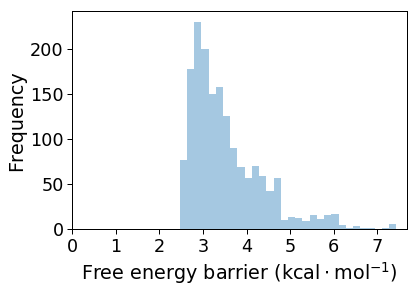

In [127]:
with sns.plotting_context('paper', font_scale=2):
    ax = sns.distplot(df['dg'], hist=True, kde=False, norm_hist=False)
    _, ub = ax.get_xlim()
    ax.set_xlim(0, ub)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Free energy barrier ($\mathrm{kcal}\cdot\mathrm{mol^{-1}}$)')
    plt.savefig('free_energy_barrier_hist.png', dpi=600, bbox_inches='tight')

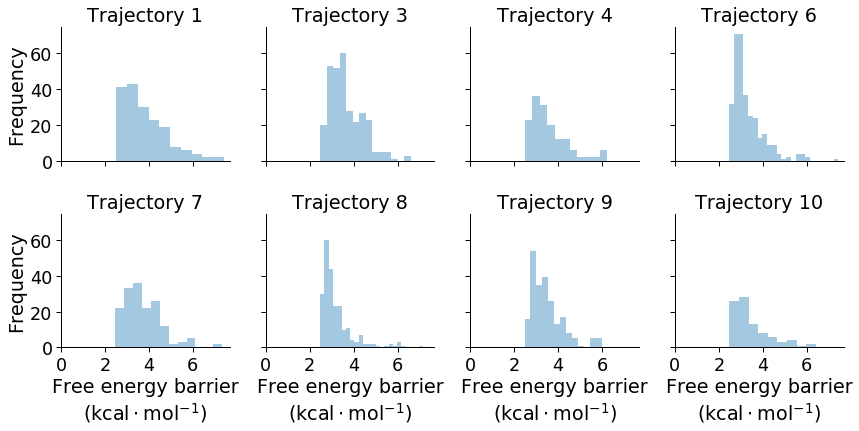

In [128]:
with sns.plotting_context('paper', font_scale=2):
    g = sns.FacetGrid(data=df, col='traj_num', col_wrap=4)
    g.map(sns.distplot, 'dg', hist=True, kde=False, norm_hist=False)
    g.set_titles("Trajectory {col_name}")
    for ax in g.axes.flatten():
        _, ub = ax.get_xlim()
        ax.set_xlim(0, ub)
    _ = [g.axes[i].set_ylabel('Frequency') for i in [0, 4]]
    _ = [g.axes[i].set_xlabel('Free energy barrier\n($\mathrm{kcal}\cdot\mathrm{mol^{-1}}$)') for i in range(4,8)]
    plt.savefig('free_energy_barrier_hist_by_traj.png', dpi=600, bbox_inches='tight')

In [2]:
df = pd.read_csv('all_timescales.csv')


In [13]:
df.loc[:, 'mean_ts'] = df.loc[:, 'mean_ts_ps']/ps_to_sec
df.loc[:, 'dg'] = df.loc[:, 'mean_ts'].apply(ts_to_dg)
df = df.loc[(df['mean_ts']!=np.inf)&(df['mean_ts_ps']>10),:]
df.describe().to_csv('all_timescales_summary.csv', index=True)
